In [1]:
import pandas as pd
import numpy as np

# Question 1 Exploratory Data Analysis

* From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip
* 1. Variable names that we are interested in:
    * sic code: four digits integer for company
    * datecqtr: year/ quarter time for the record
    * cusip: compustats identifier for a company
    * chod: shares out of standing (in million)
    * saleq: sales of current quarter (in million)
    * prccq: close price of current quarter (in dollar)
    
* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe
        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [2]:
import pandas as pd
import zipfile
##load the csv file without unzip the zip
zf = zipfile.ZipFile('example/input/compustat.zip') 
df = pd.read_csv(zf.open('compustat.csv'))

In [3]:
df

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0
5,1000,19670630,1967,2,INDL,C,D,STD,000032102,USD,1967Q2,1967Q2,0.277,NaN,I,NaN,3089.0
6,1000,19670930,1967,3,INDL,C,D,STD,000032102,USD,1967Q3,1967Q3,0.277,NaN,I,NaN,3089.0
7,1000,19671231,1967,4,INDL,C,D,STD,000032102,USD,1967Q4,1967Q4,0.277,5.363,I,NaN,3089.0
8,1000,19680331,1968,1,INDL,C,D,STD,000032102,USD,1968Q1,1968Q1,0.645,NaN,I,NaN,3089.0
9,1000,19680630,1968,2,INDL,C,D,STD,000032102,USD,1968Q2,1968Q2,0.645,NaN,I,NaN,3089.0


In [4]:
## take out the variables we need 
df1 = df[["sic","datacqtr","cusip","saleq","cshoq","prccq"]].copy()

In [5]:
##caculate the market cap
df1["m_cap"] = df1["cshoq"] * df1["prccq"]


For saleq and market cap, compute the following:
- Time series mean
- Time Series standard deviation
- Time Series count of missing values
- Time Series ratio of missing values
- Aggregate the result in a dataframe

In [6]:
## function to get all the computation we need and aggregates them in a dataframe
def stat_pd(series):
    ##length of the series
    num_all = series.isnull().count()
    ##num of the nan in the series
    num_nan = series.isnull().sum()
    ##mean if the series
    mean = series.mean()
    ##standard deviation of the series
    std = series.std()
    ##ratio of missing values
    ratio = num_nan / num_all
    return pd.Series([mean,std,num_nan,ratio],index=["mean","std","count of missing","ratio of missing"])

In [7]:
df2 = df1[["m_cap","saleq"]].apply(stat_pd)
df2

,m_cap,saleq
mean,2057.473104,445.150664
std,13202.197457,2679.706576
count of missing,468276.000000,269498.000000
ratio of missing,0.258530,0.148787


Answer the following questions:
- Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
- Implement some schemes to detect outliers.
- Do you find some outliers? Could you think why? You can do some research using google.
- What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [8]:
## 1 check the max and min value
print(pd.DataFrame([df1[["m_cap","saleq"]].max(),df1[["m_cap","saleq"]].min()],index = ["max","min"]))
##we can find the maxium value is too large compared to the mean

##Actually, we can easily get how much standard deviation is the maxium out of mean
(pd.DataFrame([df1[["m_cap","saleq"]].max(),df1[["m_cap","saleq"]].min()],index = ["max","min"]) - df2.loc["mean"])/df2.loc["std"]
## we can find out that 
## the maxium value is 116 /77 standard deviation out from mean, so there should be outliers


          m_cap       saleq
max  1540774.21  207307.334
min        0.00  -25623.000


,m_cap,saleq
max,116.550047,77.195834
min,-0.155843,-9.727987


Boxplot is used for checking if there are outliers.


In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(df1.dropna(subset=['saleq'])['saleq'])
ax2.boxplot(df1.dropna(subset=['m_cap'])['m_cap'])
ax1.set_title('saleq')
ax2.set_title('m_cap')

Text(0.5, 1.0, 'm_cap')

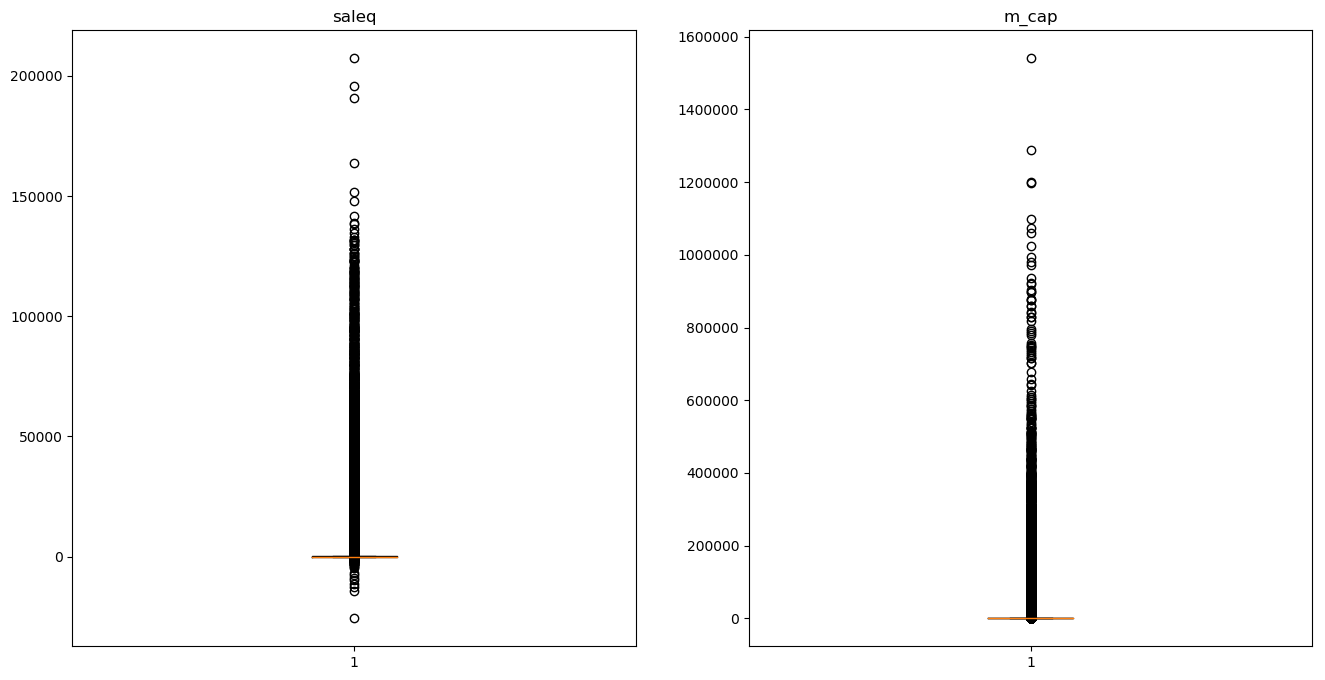

In [10]:
fig

- From the above figure, we can find out there do exist several outliers for both of the variable.
- For saleq, there is also outliers for being too small.

#### The reason for outliers


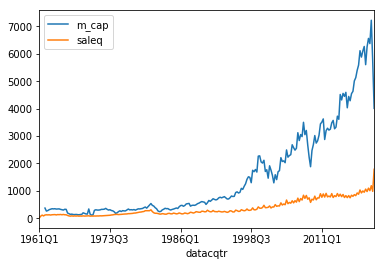

In [11]:
average_cap = df1.groupby(['datacqtr'])[['m_cap','saleq']].mean()
average_cap.plot()

- We can get from this plot that the averge of market cap is growing quikly after 1998
- While for the long time before 1998, the level is low. Which may make those large value become outliers.

#### conclusion from 2
- The data quality is not good. Too much missing data
- The fluctuation is great.

# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [12]:
##in this part we only need 
df3 = pd.DataFrame(df1,columns=['sic','datacqtr','m_cap']).dropna().reset_index()
##using a 2 digit SIC code to denote the industry
df3['industry'] = df3['sic'] // 100

In [14]:
##get the sum ind for each industry
ind_cap = df3.groupby(['datacqtr','industry'])['m_cap'].sum().reset_index()
ind_cap.rename(columns={'m_cap':'sum_cap'},inplace=True)
ind_cap.head()

,datacqtr,industry,sum_cap
0,1962Q1,45.0,56.848000
1,1962Q1,60.0,13222.092238
2,1962Q2,40.0,537.735850
3,1962Q2,45.0,56.950000
4,1962Q2,60.0,10331.887282


In [15]:
df3 = pd.merge(df3,ind_cap,on = ['datacqtr','industry'])
df3['ratio_cap'] = df3['m_cap'] / df3['sum_cap'] * 100
df3.head()

,index,sic,datacqtr,m_cap,industry,sum_cap,ratio_cap
0,18,3089.0,1970Q3,26.20250,30.0,6289.293375,0.416621
1,3077,3089.0,1970Q3,37.07050,30.0,6289.293375,0.589422
2,6830,3060.0,1970Q3,30.90450,30.0,6289.293375,0.491383
3,10038,3060.0,1970Q3,20.08825,30.0,6289.293375,0.319404
4,16893,3011.0,1970Q3,8.57475,30.0,6289.293375,0.136339


In [16]:
##pow two of capital ratio
df3['m_HHI'] = df3['ratio_cap'] * df3['ratio_cap']
##HHI based on industry and date
HHI = df3.groupby(['datacqtr','industry'])['m_HHI'].sum().reset_index()
HHI.rename(columns = {'m_HHI':'ind_HHI'},inplace=True)
##get the average hhi index for diffrent index
average_HHI = HHI.groupby(['industry'])['ind_HHI'].mean().reset_index()
average_HHI = average_HHI.sort_values(by = 'ind_HHI',ascending = False)

In [17]:
average_HHI.head(6)

,industry,ind_HHI
72,89.0,10000.000000
70,86.0,10000.000000
66,81.0,9362.460875
4,9.0,9237.889784
69,84.0,9200.079235
2,7.0,8247.612978


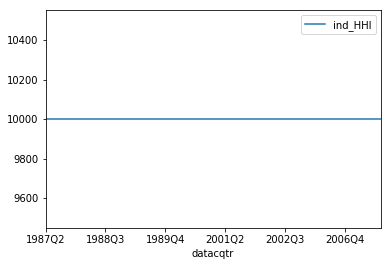

In [18]:
industry_89 = HHI[HHI['industry'] == 89]
industry_89.plot(x = 'datacqtr',y = 'ind_HHI')
## same with 86

#### plot of top four HHI industry

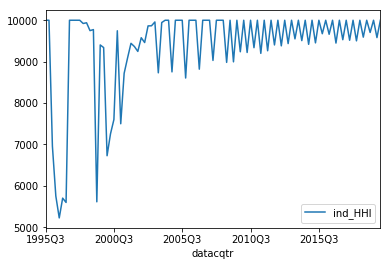

In [19]:
industry_81 = HHI[HHI['industry'] == 81]
industry_81.plot(x = 'datacqtr',y = 'ind_HHI')

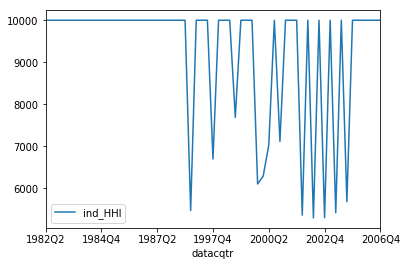

In [20]:
industry_9 = HHI[HHI['industry'] == 9]
industry_9.plot(x = 'datacqtr',y = 'ind_HHI')

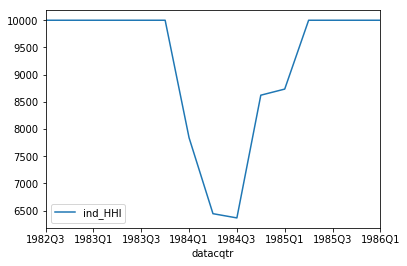

In [21]:
industry_84 = HHI[HHI['industry'] == 84]
industry_84.plot(x = 'datacqtr',y = 'ind_HHI')

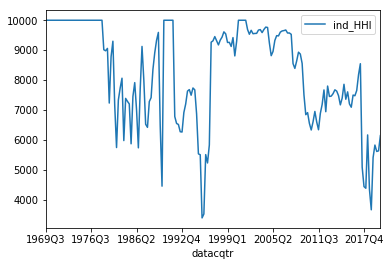

In [22]:
industry_7 = HHI[HHI['industry'] == 7]
industry_7.plot(x = 'datacqtr',y = 'ind_HHI')